# Numerisk løsning av enkel harmonisk pendel

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 1

**Forkunnskaper:** Programmeringskunnskaper tilsvarende det opparbeidet i ITGK og FY1001, spesielt bruk av Euler metoden for å løse differensialligninger. 

**Læringsmål:** Løsning av andreordens ODE med Euler-metoden, numerisk stabilitet for Euler metoden og plotting av data. 

---

I denne øvingen skal vi se på enkel harmonisk pendelbevegelse til en punktmasse. I denne modellen henger en punktmasse fra en masseløs, utøyelig snor. Vi skal først se på den analytiske løsningen av ligningen, og plotte vinkelutslaget. Deretter går vi over til numerisk løsning ved Euler-metoden, som dere ble kjent med i FY1001 Mekanisk fysikk.  

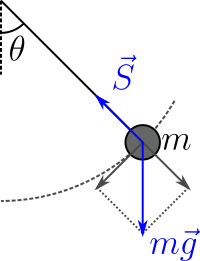
<span align="center"><strong>Figur 1:</strong> <em>Enkel pendel med masse $m$ og utslagsvinkel $\theta$.</em></span>


I figur 1 er kreftene som virker på massen som henger fra snora vist. Her er $\vec{S}$ snorkrafta og $m\vec{g}$ gravitasjonskraften. Vi antar her at kun disse to kreftene virker på massen.

## Oppgave 1 – Analytisk løsning av bevegelsesligningen for pendelen

**a)** Vis at bevegelsesligningen for pendelen er gitt ved
$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$
hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.


---

SKRIV HER (eller på papir)
(Ble skrevet på papir)

---

Anta at vinkelutslaget er lite, slik at vi kan anta $\sin \theta \approx \theta$. Bevegelsesligningen er da gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \theta.
	\label{enkelbevegelse}
\end{equation}

Den analytiske løsningen av bevegelsesligningen over er

\begin{equation}
 	\theta(t) = \theta_0 \cos(\omega t + \phi),
	\label{eq:losning}
\end{equation}

der $\omega = \sqrt{g/l}$ er vinkelfrekvensen og $\phi$ er fasen.

**b)** Plot den analytiske løsningen for vinkelutslaget, $\theta(t)$, som funksjon av tid, $t$, fram til $t=10$ s. 

Bruk følgende parametere og initialbetingelser:
- Lengden av snora, $l = 1.0$ m
- Massen til pendelen, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8$ $\text{m}/\text{s}^2$
- Startvinkelen til pendelarmen med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s


<function matplotlib.pyplot.show(close=None, block=None)>

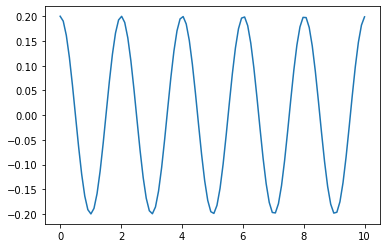

In [10]:
# Remember to import nescessary libraries!

# To show figures in the notebook
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and initial conditions
m = 5            # [kg], mass 
l = 1.0          # [m], length of string
g = 9.8          # [m/s^2], gravitational acceleration
theta_0 = 0.2    # [rad], intial angular displacement, with respect to the vertical 
w_0 = 0.0        # [rad/s], initial angular velocity
T = 10.0         # [s], evaluate up to T

def phi(t):
    return theta_0*np.cos(np.sqrt(g/l)*t)
xl = np.linspace(0, 10, 100)
yl = [phi(x) for x in xl]

plt.plot(xl, yl)
plt.show




## Oppgave 2 – Numerisk løsning av bevegelsesligningen for pendelen

$\textbf{a)}$ Skriv bevegelsesligningen med tilnærmelsen $\sin \theta = \theta$ for pendelen som to første ordens differensialligninger. Diskretiser ligningen.

---

SKRIV HER (eller på papir) (ble gjort i onenote)

---

**b)** Skriv en funksjon som returnerer beregnet utslagsvinkel, $\theta$, og vinkelfrekvens, $\omega$, opp til $t = T$ ved bruk av **Euler metoden**. Funksjonen skal ta inn tidssteget $\Delta t$, sluttiden $T$, samt initialverdiene for vinkelen og vinkelfrekvensen. Kommenter koden.

Om du trenger å repetere Euler metoden kan du gå gjennom Notebooken [Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb). 

I kolonnen under er det gitt en del kommentarer på hva du må huske å ha med i koden, og forslag til en funksjonsdeklarasjon. Om du ønsker kan du benytte dette for å få hjelp til å starte. 

*Hint:* Benytt `np.zeros`, til å lage en array av lengde `n+1` fylt med tallet 0, for $\theta$ og $\omega$. Benytt `np.linspace` for å lage et array for tiden med jevnt fordelte verdier fra en startverdi til en sluttverdi.

In [19]:
# As you already imported numpy and matplotlib above, you do not have to import again.
# (as long as you ran the cell)

def euler_method(theta_0, w_0, dt, T):
    """
    Calculates angular displacement and angular velocity using the Euler method.

    theta_0: initial angular displacement
    w_0: initial angular velocity (omega) 
    dt: timestep
    T: max T
    """
    # SKRIV KODE HER
    t = np.linspace(0, T, int(T//dt))
    theta = np.zeros(len(t))
    w = np.zeros(len(t))
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(1, len(t)):
        theta[i] = theta[i-1] + dt*w[i-1]
        w[i] = w[i-1] + dt*((-g/l)*theta[i-1])
    
    
    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta, w, t

**c)** Plot utslagsvinkelen, $\theta$, som funksjon av tid, $t$, sammen med den analytiske løsningen av bevegelsesligningen (opp til $t=10$ s). Bruk tidsstegene $\Delta t = 0.001$ s og $\Delta t = 0.004$ s og $\Delta t = 0.007$ s.

Vær nøye med navn på akser, legg til legend, og ha med tittel. Du kan øke grensene for y-aksen med `plt.ylim(min, max)`, om du ønsker det. 

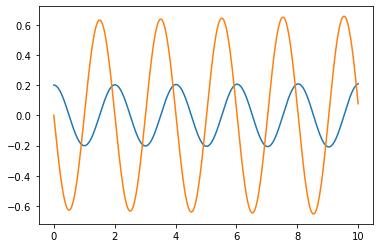

In [20]:
phi = 0

theta, w, t = euler_method(theta_0, w_0, 0.001, T)

plt.plot(t, theta)
plt.plot(t,w)
plt.show()

**d)** Observer fra plottet over at amplituden til utslagsvinkel for den numeriske løsningen vil øke med tid (om du ikke ser dette tydelig, så øk tidssteget litt). Vi skal nå se på energien til pendelen og forstå hvorfor dette skjer. 
1. Vis at energien til pendelen er gitt ved $E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2$ for små vinkelutslag.
*Hint:* Skriv ned det generelle utrykket for energi, og utrykk hastigheten i vinkelhastigheten. Definer nullpunktet for den postensielle energien der $\theta = 0$.


2. Skriv en funksjon som returnerer en array med den totale energien til pendelen for tider opp til $t=10.0$ s.
*Hint:* Husk numpy arrays er kompatible med vanlige operatorer.


3. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$, $\Delta t = 0.004$ og $\Delta t = 0.007$. Husk å gi plottene passende label, og inkluder legend. Du vil observere at den totale energien øker med tid. Energien vil øke mindre for små tidssteg, men vil alltid øke litt. Vi må derfor benytte en annen metode for å få en fysisk løsning (dette skal vi implementere i neste øving)

---

1.

SKRIV HER (eller på papir)

---

In [ ]:
# 2.

def energy_calculation(theta_0, w_0, dt, T):
    """
    Calculates total energy for each time which theta and omega is calculated for.
    
    theta0: initial angular displacement
    w0: initial angular velocity 
    dt: timestep
    T: max T
    """
    
    # SKRIV KODE HER
        
    """
    E_total: array with the total energy found from values of theta and w (omega)
    t: array with timevalues 
    """
    
    
    return E_total, t 

# 3.

# SKRIV KODE FOR Å PLOTTE ENERGIEN HER